<a href="https://colab.research.google.com/github/humeraaa/UOK.Geology/blob/master/Geology2k18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install OpticalRS. This also installs GeoPandas because GeoPandas is a dependency of OpticalRS
!apt-get install software-properties-common python-software-properties > /dev/null
!add-apt-repository ppa:ubuntugis/ppa -y > /dev/null
!apt-get update > /dev/null
!apt-get install -y --fix-missing python-gdal gdal-bin libgdal-dev > /dev/null
!pip2 install OpticalRS > /dev/null

E: Package 'python-software-properties' has no installation candidate
E: The repository 'http://ppa.launchpad.net/ubuntugis/ppa/ubuntu bionic Release' does not have a Release file.
E: The repository 'http://ppa.launchpad.net/ubuntugis/ppa/ubuntu bionic Release' does not have a Release file.
Extracting templates from packages: 100%


In [38]:
# Loading my local files into Colaboratory
from google.colab import files
uploaded = files.upload()

Saving Intro_python_geo-master.zip to Intro_python_geo-master.zip


In [39]:
ls

Intro_python_geo-master.zip  shapefiles.zip  WDPA_polygons.shp


In [0]:
from zipfile import ZipFile

In [44]:
!unzip Intro_python_geo-master.zip

Archive:  Intro_python_geo-master.zip
527b4dc20552629da36a2bc8cd3f4a71f0de3309
   creating: Intro_python_geo-master/
   creating: Intro_python_geo-master/Data/
   creating: Intro_python_geo-master/Data/rasters/
  inflating: Intro_python_geo-master/Data/rasters/bathy_caribb_4326.tif  
   creating: Intro_python_geo-master/Data/shapefiles/
 extracting: Intro_python_geo-master/Data/shapefiles/WDPA_polygons.cpg  
  inflating: Intro_python_geo-master/Data/shapefiles/WDPA_polygons.dbf  
  inflating: Intro_python_geo-master/Data/shapefiles/WDPA_polygons.prj  
  inflating: Intro_python_geo-master/Data/shapefiles/WDPA_polygons.shp  
  inflating: Intro_python_geo-master/Data/shapefiles/WDPA_polygons.shx  
  inflating: Intro_python_geo-master/Intro_Python_geospatial.ipynb  
  inflating: Intro_python_geo-master/OpticalRS_intall.ipynb  
  inflating: Intro_python_geo-master/Summary_table_WDPA_attributes.pdf  
  inflating: Intro_python_geo-master/WDPA_Manual_1_4_EN_FINAL.pdf  
   creating: Intro_pytho

In [24]:
!pip install geopandas
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib

  Using cached https://files.pythonhosted.org/packages/24/11/d77c157c16909bd77557d00798b05a5b6615ed60acb5900fbe6a65d35e93/geopandas-0.4.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/29/72/5c1888c4948a0c7b736d10e0f0f69966e7c0874a660222ed0a2c2c6daa9f/pyproj-1.9.5.1.tar.gz
    100% |████████████████████████████████| 1.5MB 13.6MB/s 
    100% |████████████████████████████████| 17.9MB 2.2MB/s 
  Using cached https://files.pythonhosted.org/packages/95/dd/fef84cf1678418f241ef542c0288bdf215bdd3e35f1fe03dc5223a2e80ba/click_plugins-1.0.4-py2.py3-none-any.whl
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / 

In [0]:
# Define your vector filepath
conserve_fp = "WDPA_polygons.shp"



In [47]:
ls

Intro_python_geo-master/     shapefiles.zip
Intro_python_geo-master.zip  WDPA_polygons.shp


In [48]:
cd Intro_python_geo-master

/root/Intro_python_geo-master


In [49]:
!ls

Data	Intro_Python_geospatial.ipynb  Summary_table_WDPA_attributes.pdf
images	OpticalRS_intall.ipynb	       WDPA_Manual_1_4_EN_FINAL.pdf


In [0]:
!pip2 install OpticalRS > /dev/null

In [50]:
cd Data

/root/Intro_python_geo-master/Data


In [52]:
cd shapefiles

/root/Intro_python_geo-master/Data/shapefiles


In [53]:
!ls

WDPA_polygons.cpg  WDPA_polygons.prj  WDPA_polygons.shx
WDPA_polygons.dbf  WDPA_polygons.shp


In [0]:
# Read vector data in as GeoDataFrame
import geopandas as gpd
conserve = gpd.read_file(conserve_fp)

Our first preprocessing step is to check on the data's projection. Projections can be tricky and I'm not going to delve too far into this topic here, but below are some basic steps for identifying and changing your data's projection (more details can be found here).

In [59]:
# Check the Coordinate Reference System (CRS)
conserve.crs

{}

In [62]:
!pip2 install OpticalRS

In [0]:
# Read vector data in as GeoDataFrame
import geopandas as gpd
conserve = gpd.read_file(conserve_fp)

In [0]:
# Define your vector filepath
conserve_fp = "WDPA_polygons.shp"

In [69]:
# Look at the first few features in our attribute table
conserve.head()

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,555624222.0,555624222,1,La Caleta,La Caleta,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,POLYGON ((-69.70475633263862 18.45382580331824...
1,555624132.0,555624132,1,Humedales de Jaragua,Humedales de Jaragua,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii) (iv) (vii) (viii),...,Not Reported,Not Reported,Not Reported,https://rsis.ramsar.org/ris/2210,State Verified,1856,Not Reported,DOM,DOM,(POLYGON ((-71.53151544068498 17.7571400007105...
2,555624219.0,555624219,1,Los Haitises,Los Haitises,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,(POLYGON ((-69.87710541868012 19.1207403670743...
3,555624220.0,555624220,1,Jaragua,Jaragua,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,"POLYGON ((-71.6339539899846 18.07129016161173,..."
4,555624221.0,555624221,1,Sierra de Bahoruco,Sierra de Bahoruco,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,POLYGON ((-71.49641143973611 17.93031775625951...


In [70]:
# Look at all of the attributes in your dataset
conserve.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 29 columns):
WDPAID        143 non-null float64
WDPA_PID      143 non-null object
PA_DEF        143 non-null object
NAME          143 non-null object
ORIG_NAME     143 non-null object
DESIG         143 non-null object
DESIG_ENG     143 non-null object
DESIG_TYPE    143 non-null object
IUCN_CAT      143 non-null object
INT_CRIT      143 non-null object
MARINE        143 non-null object
REP_M_AREA    143 non-null float64
GIS_M_AREA    143 non-null float64
REP_AREA      143 non-null float64
GIS_AREA      143 non-null float64
NO_TAKE       143 non-null object
NO_TK_AREA    143 non-null float64
STATUS        143 non-null object
STATUS_YR     143 non-null int64
GOV_TYPE      143 non-null object
OWN_TYPE      143 non-null object
MANG_AUTH     143 non-null object
MANG_PLAN     143 non-null object
VERIF         143 non-null object
METADATAID    143 non-null int64
SUB_LOC       143 non-null object

In [71]:
# What is the total conserved area in the DR? Conserved area = "GIS_AREA" (we'll discuss how to use the inherent geometry of the GeoDataFrame to do this later).
area_sum = conserve.GIS_AREA.sum()
area_sum

65255.47670531727

In [72]:
# What is the largest area conserved?
area_max = conserve.GIS_AREA.max()
area_max

35469.1970057065

In [73]:
# What is the smallest area conserved?
area_min = conserve.GIS_AREA.min()
area_min

0.007879848064912

In [74]:
# What are the unique values for the "MARINE" attribute?
conserve['MARINE'].unique()

array(['2', '1', '0'], dtype=object)

In [75]:
# How many different areas are "Marine" (2), "Terrestrial" (0), or both (1)?
type_park = conserve['MARINE'].value_counts()
type_park

0    109
1     27
2      7
Name: MARINE, dtype: int64

In [0]:
# Write all of this info into a string
"The total conserved area is {} square meters and there are {} MPAs, {} terrestrial areas, and {} mixed areas".format(area_sum, type_park["2"], type_park["0"], type_park["1"])

In [89]:
conserve.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 29 columns):
WDPAID        143 non-null float64
WDPA_PID      143 non-null object
PA_DEF        143 non-null object
NAME          143 non-null object
ORIG_NAME     143 non-null object
DESIG         143 non-null object
DESIG_ENG     143 non-null object
DESIG_TYPE    143 non-null object
IUCN_CAT      143 non-null object
INT_CRIT      143 non-null object
MARINE        143 non-null object
REP_M_AREA    143 non-null float64
GIS_M_AREA    143 non-null float64
REP_AREA      143 non-null float64
GIS_AREA      143 non-null float64
NO_TAKE       143 non-null object
NO_TK_AREA    143 non-null float64
STATUS        143 non-null object
STATUS_YR     143 non-null int64
GOV_TYPE      143 non-null object
OWN_TYPE      143 non-null object
MANG_AUTH     143 non-null object
MANG_PLAN     143 non-null object
VERIF         143 non-null object
METADATAID    143 non-null int64
SUB_LOC       143 non-null object

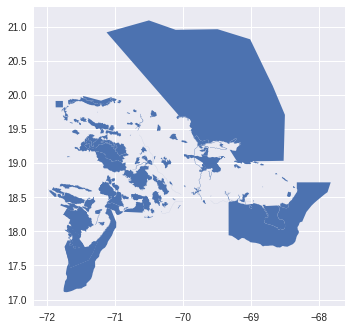

In [93]:
!pip install shapely
!pip install descartes

conserve.plot()

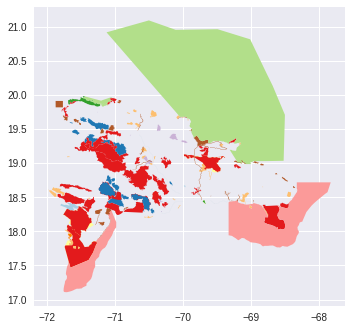

In [94]:
# Plot conservation areas as choropleth by park type
conserve.plot(column = "DESIG_ENG", cmap = "Paired")

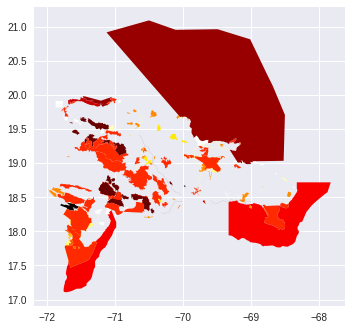

In [95]:
# Make it red! Color palettes: https://matplotlib.org/users/colormaps.html
conserve.plot(column = "DESIG_ENG", cmap = "hot")

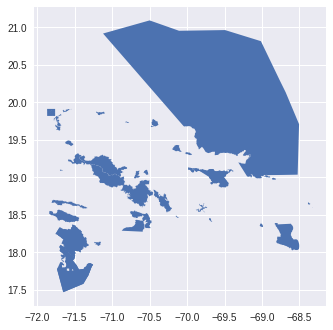

In [96]:
# Plot conservation areas where the area has a Use Management Plan.
conserve[conserve['MANG_PLAN'] != "No"].plot()

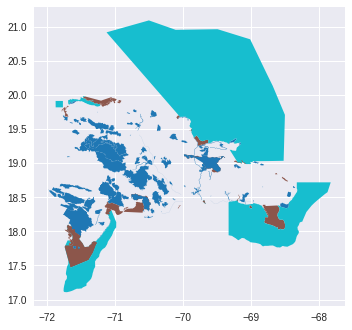

In [97]:
# Plot conservation areas as a choropleth by the "MARINE" attribute
conserve.plot(column = "MARINE")

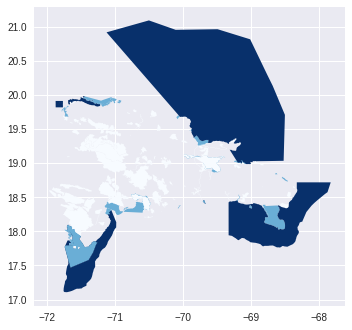

In [98]:
# Make it blue (obviously)! https://matplotlib.org/users/colormaps.html
conserve.plot(column = 'MARINE', cmap="Blues")

In [99]:
# Take a look at our first few lines of data
conserve.head(3)

,WDPAID,WDPA_PID,PA_DEF,NAME,ORIG_NAME,DESIG,DESIG_ENG,DESIG_TYPE,IUCN_CAT,INT_CRIT,...,GOV_TYPE,OWN_TYPE,MANG_AUTH,MANG_PLAN,VERIF,METADATAID,SUB_LOC,PARENT_ISO,ISO3,geometry
0,555624222.0,555624222,1,La Caleta,La Caleta,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,POLYGON ((-69.70475633263862 18.45382580331824...
1,555624132.0,555624132,1,Humedales de Jaragua,Humedales de Jaragua,"Ramsar Site, Wetland of International Importance","Ramsar Site, Wetland of International Importance",International,Not Reported,(ii) (iv) (vii) (viii),...,Not Reported,Not Reported,Not Reported,https://rsis.ramsar.org/ris/2210,State Verified,1856,Not Reported,DOM,DOM,(POLYGON ((-71.53151544068498 17.7571400007105...
2,555624219.0,555624219,1,Los Haitises,Los Haitises,Specially Protected Area (Cartagena Convention),Specially Protected Area (Cartagena Convention),Regional,II,Not Applicable,...,Federal or national ministry or agency,Not Reported,Secretaria de Estado de Medio Ambiente y Recur...,http://www.spaw-palisting.org/area_public/show...,State Verified,1900,Marine,DOM,DOM,(POLYGON ((-69.87710541868012 19.1207403670743...


In [103]:
# Call your geometry attribute and find its Shapely geometry type
conserve.geometry.head()

0    POLYGON ((-69.70475633263862 18.45382580331824...
1    (POLYGON ((-71.53151544068498 17.7571400007105...
2    (POLYGON ((-69.87710541868012 19.1207403670743...
3    POLYGON ((-71.6339539899846 18.07129016161173,...
4    POLYGON ((-71.49641143973611 17.93031775625951...
Name: geometry, dtype: object